# Processing data after running the Genetic Algorithm
First, we will look at what values the genetic algorithm gave us.   
Then, we will backcalculate the fold changes for each set of model parameters

In [16]:
import tellurium as te
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# pd.set_option("display.max_rows", None, "display.max_columns", None)
# pd.reset_option('^display.', silent=True)

# Viewing the data using pandas

In [6]:
# open the results file
f = open("data/20210823_2/paramData.list", "r")
lines = f.read()
# parse the data into an array 
list_of_lines = lines.splitlines()
f.close()
# reshape into numpy
arr = np.array(list_of_lines)
arr = arr.astype('float64')
arr = np.reshape(arr, (100, 5))
df = pd.DataFrame(arr, columns = ['k1','k2', 'k3','k4','k5'])

g = open("data/20210823_2/scores.list", "r")
gines = g.read()
gist_of_gines = gines.splitlines()
g.close()
garr = np.array(gist_of_gines)
garr = garr.astype('float64')
garr = np.reshape(garr, (100, 1))
gf = pd.DataFrame(garr, columns = ['chiSq'])

data = pd.concat((df, gf),axis=1)
data

,k1,k2,k3,k4,k5,chiSq
0,182.379932,295.765556,623.033002,439.241455,556.737250,0.016173
1,171.147842,326.663848,623.033002,1010.502124,698.477527,0.007580
2,227.378690,358.532688,912.340447,879.165524,757.685370,0.013401
3,179.086929,422.790399,951.477396,786.532848,628.535379,0.019565
4,165.435783,258.521841,735.032900,726.684355,731.852014,0.011109
...,...,...,...,...,...,...
95,163.505985,422.790399,801.024994,657.357760,757.824680,0.020549
96,220.070965,515.601909,844.162723,879.165524,718.599916,0.010382
97,182.379932,295.765556,623.033002,561.888142,740.871561,0.010038
98,182.379932,326.663848,623.033002,879.165524,698.477527,0.005381


In [7]:
# to view data from least to greatest chi square values
data.sort_values(by='chiSq')

,k1,k2,k3,k4,k5,chiSq
55,262.822298,515.601909,844.162723,879.165524,757.685370,0.004129
30,182.379932,326.663848,623.033002,561.888142,740.871561,0.004455
71,172.052792,321.743868,829.283133,879.165524,809.141383,0.004884
98,182.379932,326.663848,623.033002,879.165524,698.477527,0.005381
70,165.435783,321.743868,829.283133,879.165524,757.402533,0.006472
...,...,...,...,...,...,...
33,203.575538,253.289877,818.808843,818.872682,643.635381,0.047316
90,218.212445,295.765556,806.793368,425.122447,479.687385,0.050079
54,218.212445,253.289877,733.748219,879.165524,757.685370,0.062006
87,218.212445,253.289877,733.748219,728.971724,643.635381,0.064784


# Backcalculating the predicted fold changes for each set of model parameters

In [1]:
import backCheck
from core import evaluate
from core import models

In [4]:
folders = ['data/20210823_3','data/20210823_5','data/20210824_1','data/20210824_2']

for f in folders:
    backCheck.getFoldChangeValues(paramData=(f + "/paramData.list"), folderName=f)

In [39]:
# the original, expected values to compare with the values in 'allData.list'
original = evaluate.runExperiment(models.groundTruth_mod_e)
original

array([ 0.69887834,  0.69887834,  0.69887834,  0.69887834, -0.34168351,
        0.0736096 ,  0.0736096 ,  0.0736096 , -0.07181795, -0.37015035,
        0.01547189,  0.01547189, -0.01774854, -0.0914761 , -0.39242256,
        0.0038236 , -0.00471971, -0.02432542, -0.10435341, -0.49949161,
        0.69887834,  0.0736096 ,  0.01547189,  0.0038236 ,  0.00101678])

# Distribution of parameters

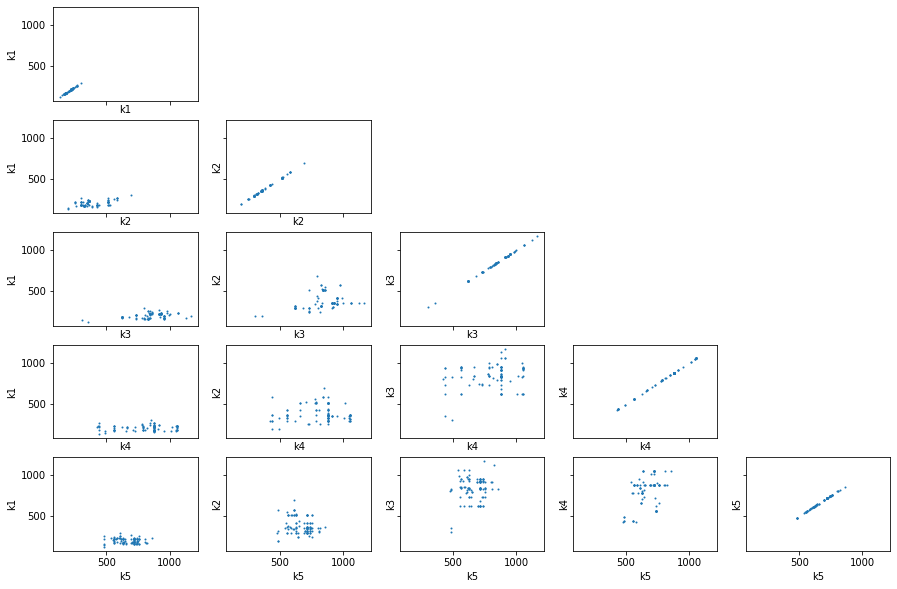

In [8]:
fig, axs = plt.subplots(5,5, sharex=True, sharey=True, figsize=(15, 10)) 

kList = ['k1','k2','k3','k4','k5']

for i,ii in enumerate(kList):
  for j in range(i+1):
    axs[i,j].scatter(df[ii], df[kList[j]], s=1)
    axs[i,j].set(xlabel=ii, ylabel=kList[j]) 

  for k in range(i+1, len(kList)): 
    fig.delaxes(axs[i,k]) 



In [129]:
# make a pandas DataFrame
pandasList = []
runID = []

for f in folders:
    allDataList = open(f + "/allData.list")
    lines = allDataList.readlines()
    allDataList.close()

    for line in lines:
        pandasList.append([float(x) for x in line.split()])
    runID += [f]*100

pandasList.append(original.tolist())
runID.append('original')

df = pd.DataFrame(pandasList, columns=['E1-S2', 'E1-S3', 'E1-S4', 'E1-S5',
                                    'E2-S2', 'E2-S3', 'E2-S4', 'E2-S5',
                                    'E3-S2', 'E3-S3', 'E3-S4', 'E3-S5',
                                    'E4-S2', 'E4-S3', 'E4-S4', 'E4-S5',
                                    'E5-S2', 'E5-S3', 'E5-S4', 'E5-S5',
                                    'F-E1', 'F-E2', 'F-E3', 'F-E4', 'F-E5'])
df['runID'] = runID
df

,E1-S2,E1-S3,E1-S4,E1-S5,E2-S2,E2-S3,E2-S4,E2-S5,E3-S2,E3-S3,...,E5-S2,E5-S3,E5-S4,E5-S5,F-E1,F-E2,F-E3,F-E4,F-E5,runID
0,0.698672,0.698672,0.698672,0.698672,-0.341658,0.073676,0.073676,0.073676,-0.071756,-0.369930,...,-0.004725,-0.024362,-0.104322,-0.499490,0.698672,0.073676,0.015474,0.003833,0.001019,data/20210823_3
1,0.698672,0.698672,0.698672,0.698672,-0.341658,0.073676,0.073676,0.073676,-0.071756,-0.369930,...,-0.004725,-0.024362,-0.104322,-0.499490,0.698672,0.073676,0.015474,0.003833,0.001019,data/20210823_3
2,0.698672,0.698672,0.698672,0.698672,-0.341658,0.073676,0.073676,0.073676,-0.071756,-0.369930,...,-0.004725,-0.024362,-0.104322,-0.499490,0.698672,0.073676,0.015474,0.003833,0.001019,data/20210823_3
3,0.698672,0.698672,0.698672,0.698672,-0.341658,0.073676,0.073676,0.073676,-0.071756,-0.369930,...,-0.004725,-0.024362,-0.104322,-0.499490,0.698672,0.073676,0.015474,0.003833,0.001019,data/20210823_3
4,0.698672,0.698672,0.698672,0.698672,-0.341658,0.073676,0.073676,0.073676,-0.071756,-0.369930,...,-0.004725,-0.024362,-0.104322,-0.499490,0.698672,0.073676,0.015474,0.003833,0.001019,data/20210823_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0.679915,0.679915,0.679915,0.679915,-0.349828,0.082345,0.082345,0.082345,-0.063257,-0.373104,...,-0.004088,-0.024114,-0.105565,-0.499519,0.679915,0.082345,0.014890,0.003568,0.000962,data/20210824_2
397,0.710764,0.710764,0.710764,0.710764,-0.342709,0.069731,0.069731,0.069731,-0.073995,-0.373998,...,-0.004632,-0.023410,-0.103379,-0.499529,0.710764,0.069731,0.015056,0.003588,0.000942,data/20210824_2
398,0.665820,0.665820,0.665820,0.665820,-0.336609,0.084473,0.084473,0.084473,-0.067541,-0.361197,...,-0.004760,-0.025456,-0.102782,-0.499403,0.665820,0.084473,0.016950,0.004572,0.001195,data/20210824_2
399,0.701434,0.701434,0.701434,0.701434,-0.348062,0.074076,0.074076,0.074076,-0.068118,-0.371643,...,-0.004394,-0.023972,-0.103385,-0.499532,0.701434,0.074076,0.014497,0.003560,0.000935,data/20210824_2


In [97]:
# get the percent difference from original
processing = df.loc[:,'E1-S2':'F-E5'].subtract(df.iloc[400,0:25]).div(df.iloc[400,0:25])
processed_DF = pd.DataFrame(processing, dtype='float')

In [156]:
# map colors
def makeIntoColors(runID):
    if runID == 'data/20210823_3':
        return 'b'
    elif runID == 'data/20210823_5':
        return 'g'
    elif runID == 'data/20210824_1':
        return 'm'
    elif runID == 'data/20210824_2':
        return 'c'
    else:
        return 'r'

color = list(map(makeIntoColors, df['runID'].to_list()))

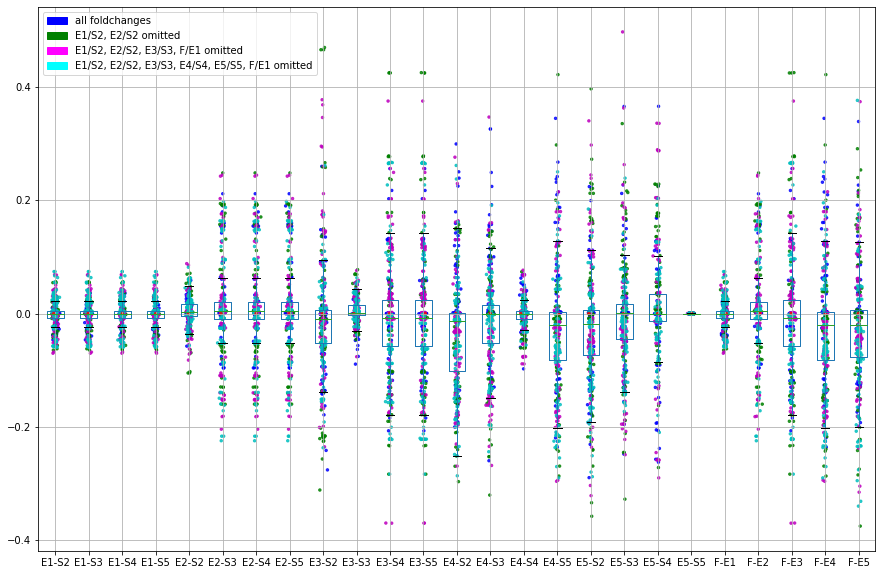

In [159]:
# create boxplot of spread
processed_DF.boxplot(figsize=(15,10), showfliers=False)

for i,d in enumerate(processed_DF): # for each column name
    y = processed_DF[d]
    x = np.random.normal(i+1, 0.04, len(y))
    plt.scatter(x, y, s=6, c=color, alpha=0.8)

# legend
blue_patch = mpatches.Patch(color='blue', label='all foldchanges')
green_patch = mpatches.Patch(color='green', label='E1/S2, E2/S2 omitted')
magenta_patch = mpatches.Patch(color='magenta', label='E1/S2, E2/S2, E3/S3, F/E1 omitted')
cyan_patch = mpatches.Patch(color='cyan', label='E1/S2, E2/S2, E3/S3, E4/S4, E5/S5, F/E1 omitted')

plt.legend(handles=[blue_patch, green_patch, magenta_patch, cyan_patch])
